In [1]:
import tensorflow as tf
import numpy as np 
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [2]:
save_model = 'D:/projects/ai/poc/homework/training_model.h5'

In [3]:
df = pd.read_csv('D:/projects/ai/poc/homework/training_data_20210128.csv')
df_test = pd.read_csv('D:/projects/ai/poc/homework/testing_data_20210128.csv')

In [4]:
df=df.head(1000)

In [5]:
#df = pd.read_excel(source_file_path)
#df = pd.read_csv(source_file_path)

df['PRIORITY'] = df['PRIORITY'].astype(str)
df['IS_MAIN_ROUTE'] = df['IS_MAIN_ROUTE'].astype(str)
df['DATA_DATE'] = df['DATA_DATE'].astype(str)
df = df.loc[df['LOT_TYPE']=='FDY']
df = df.loc[df['LAYER']!='XX']

df_test['PRIORITY'] = df_test['PRIORITY'].astype(str)
df_test['IS_MAIN_ROUTE'] = df_test['IS_MAIN_ROUTE'].astype(str)

df_test['DATA_DATE'] = df_test['DATA_DATE'].astype(str)
df_test = df_test.loc[df_test['LOT_TYPE']=='FDY']
df_test = df_test.loc[df_test['LAYER']!='XX']



In [6]:
df['DATA_DATE'] = pd.to_datetime(df['DATA_DATE'], infer_datetime_format=True)
df['WS_DATE'] = pd.to_datetime(df['WS_DATE'], infer_datetime_format=True)
df = df.assign(PROCESSED_DAYS = ((df['DATA_DATE'] -df['WS_DATE'])/pd.Timedelta(1, 'D')).fillna(0).astype(int))
df['ACTUAL_WP_OUT'] =pd.to_datetime(df['ACTUAL_WP_OUT'], infer_datetime_format=True)
df = df.assign(REMAIN_DAYS=((df['ACTUAL_WP_OUT']-df['DATA_DATE'])/pd.Timedelta(1, 'D')).fillna(0).astype(int))



df_test['DATA_DATE'] = pd.to_datetime(df['DATA_DATE'], infer_datetime_format=True)
df_test['WS_DATE'] = pd.to_datetime(df['WS_DATE'], infer_datetime_format=True)
df_test = df.assign(PROCESSED_DAYS = ((df_test['DATA_DATE'] -df_test['WS_DATE'])/pd.Timedelta(1, 'D')).fillna(0).astype(int))
df_test['ACTUAL_WP_OUT'] =pd.to_datetime(df_test['ACTUAL_WP_OUT'], infer_datetime_format=True)
df_test = df_test.assign(REMAIN_DAYS=((df_test['ACTUAL_WP_OUT']-df['DATA_DATE'])/pd.Timedelta(1, 'D')).fillna(0).astype(int))

In [210]:
# df.fillna(0, inplace=True)
# df = df.assign(REMAIN_DAYS = ((pd.to_datetime(df['ACTUAL_WP_OUT'], format='%Y%m%d')-pd.to_datetime(df['DATA_DATE'], format='%Y%m%d'))/pd.Timedelta(1, 'D')).fillna(0).astype(int))
#df = train_df.drop(train_df.loc[:, '0E':'ZL'].columns, axis = 1)
df2 = df.drop(columns=['IDX','LOT_TYPE','WS_DATE','ACTUAL_WP_OUT','DATA_DATE','LAYER','LOT_ID' ,'0I', '1C', '1D', '1F', '1G', '1I',                   '1M', '1N', '1P','0E', '1B',
              '1T', '1U', '1V', '2D', '2E', '2F', '2I', '2M', '2N', '2P', '2T', '2U',
              '2V', '3D', '3E', '3G', '3I', '3K', '3M', '3N', '3P', '3S', '3T', '3U',
              '3V', '4D', '4E', '4I', '4M', '4N', '4T', '4U', '4V', '5D', '5E', '5I',
              '5M', '5N', '5P', '5S', '6D', '6I', '6N', '6P', '7D', '7I', '8D', '8I',
              '9D', 'DO', 'ES', 'GN', 'HR', 'LI', 'PO', 'PV', 'SP', 'SV', 'TM',
              'PG', 'PH', 'PI', 'PM', 'PS', 'PT', 'PZ', 'QC',
              'TU','RG', 'RL', 'RM', 'RN', 'RT', 'RZ', 'SB', 'SC',
              'NC', 'ND', 'NH', 'NK', 'NM', 'ON', 'PB', 'PE',
              'MM', 'MP', 'MR', 'MS', 'MT', 'MU', 'MV', 'MZ',
              'HG', 'HS', 'LD', 'LG', 'LK', 'M0', 'MC', 'MG',
              'HG', 'HS', 'LD', 'LG', 'LK', 'M0', 'MC', 'MG',
              'GE', 'GF', 'GP', 'GR', 'GT', 'GZ', 'HD', 'HE', 
              'FG', 'FS', 'FT', 'G1', 'G3', 'GB', 'GC', 'GD',
              'ED', 'EP', 'ET', 'FB', 'FC', 'FD', 'FE', 'FF', 
              'HG', 'HS', 'LD', 'LG', 'LK', 'M0', 'MC', 'MG', 
              'CP', 'CS', 'CV', 'DD', 'DE', 'DG', 'DT', 'DV',
              'HG', 'HS', 'LD', 'LG', 'LK', 'M0', 'MC', 'MG', 
              '1E', '1J', '1K', '1R', '1S',
              '1W', '1Z', '2B', '2C', '2G', '2J', '2K', '2S', '2Z', '3B', '3C', '3F',
              '4F', '4J', '4K', '4P', '4S', '5F', '5G', '5J', '5K', '5T', '5U', '5V',
              '6E', '6F', '6K', '6M', '6S', '6T', '6U', '6V', '7E', '7F', '7M', '7N',
              '7P', '7S', '7U', '7V', '8E', '8N', '8P', '8S', '8U', '8V', '9E', '9I',
              '9J', '9K', '9N', '9P', '9U', '9V', 'AD', 'AE', 'AF', 'AM', 'AN', 'AP',
              'AR', 'AS', 'AV', 'B3', 'BC', 'BD', 'BG', 'BL', 'BN', 'BO', 'BP', 'BS',
              'BT', 'BX', 'BZ', 'C0', 'CD', 'CE', 'CG', 'CN',
              'TV', 'UG','UK', 'UM', 'UT', 'WL', 'WS', 'WT', 'ZL','SE', 'SG', 'SR', 'ST', 'SX', 'T1', 'TG', 'UJ'])
df2_test = df_test.drop(columns=['IDX','LOT_TYPE','WS_DATE','ACTUAL_WP_OUT','DATA_DATE','LAYER','LOT_ID' ,'0I', '1C', '1D', '1F', '1G', '1I',                   '1M', '1N', '1P','0E', '1B',
              '1T', '1U', '1V', '2D', '2E', '2F', '2I', '2M', '2N', '2P', '2T', '2U',
              '2V', '3D', '3E', '3G', '3I', '3K', '3M', '3N', '3P', '3S', '3T', '3U',
              '3V', '4D', '4E', '4I', '4M', '4N', '4T', '4U', '4V', '5D', '5E', '5I',
              '5M', '5N', '5P', '5S', '6D', '6I', '6N', '6P', '7D', '7I', '8D', '8I',
              '9D', 'DO', 'ES', 'GN', 'HR', 'LI', 'PO', 'PV', 'SP', 'SV', 'TM',
              'PG', 'PH', 'PI', 'PM', 'PS', 'PT', 'PZ', 'QC',
              'TU','RG', 'RL', 'RM', 'RN', 'RT', 'RZ', 'SB', 'SC',
              'NC', 'ND', 'NH', 'NK', 'NM', 'ON', 'PB', 'PE',
              'MM', 'MP', 'MR', 'MS', 'MT', 'MU', 'MV', 'MZ',
              'HG', 'HS', 'LD', 'LG', 'LK', 'M0', 'MC', 'MG',
              'HG', 'HS', 'LD', 'LG', 'LK', 'M0', 'MC', 'MG',
              'GE', 'GF', 'GP', 'GR', 'GT', 'GZ', 'HD', 'HE', 
              'FG', 'FS', 'FT', 'G1', 'G3', 'GB', 'GC', 'GD',
              'ED', 'EP', 'ET', 'FB', 'FC', 'FD', 'FE', 'FF', 
              'HG', 'HS', 'LD', 'LG', 'LK', 'M0', 'MC', 'MG', 
              'CP', 'CS', 'CV', 'DD', 'DE', 'DG', 'DT', 'DV',
              'HG', 'HS', 'LD', 'LG', 'LK', 'M0', 'MC', 'MG', 
              '1E', '1J', '1K', '1R', '1S',
              '1W', '1Z', '2B', '2C', '2G', '2J', '2K', '2S', '2Z', '3B', '3C', '3F',
              '4F', '4J', '4K', '4P', '4S', '5F', '5G', '5J', '5K', '5T', '5U', '5V',
              '6E', '6F', '6K', '6M', '6S', '6T', '6U', '6V', '7E', '7F', '7M', '7N',
              '7P', '7S', '7U', '7V', '8E', '8N', '8P', '8S', '8U', '8V', '9E', '9I',
              '9J', '9K', '9N', '9P', '9U', '9V', 'AD', 'AE', 'AF', 'AM', 'AN', 'AP',
              'AR', 'AS', 'AV', 'B3', 'BC', 'BD', 'BG', 'BL', 'BN', 'BO', 'BP', 'BS',
              'BT', 'BX', 'BZ', 'C0', 'CD', 'CE', 'CG', 'CN',
              'TV', 'UG','UK', 'UM', 'UT', 'WL', 'WS', 'WT', 'ZL','SE', 'SG', 'SR', 'ST', 'SX', 'T1', 'TG', 'UJ'])

In [211]:
 
labelencoder = LabelEncoder()
df2['PRIORITY'] = labelencoder.fit_transform(df2['PRIORITY'])
df2['IS_MAIN_ROUTE'] = labelencoder.fit_transform(df2['IS_MAIN_ROUTE'])
df2['STATUS'] = labelencoder.fit_transform(df2['STATUS'])
df2['CHIPNAME'] = labelencoder.fit_transform(df2['CHIPNAME'])
df2['OP_NO'] = labelencoder.fit_transform(df2['OP_NO'])
# df2.info()

X_dropped = np.asarray(df2.drop('REMAIN_DAYS', axis=1))
Y_dropped = np.asarray(df2['REMAIN_DAYS'])
# Separate labels with features  
# 將 dataframe 轉換為 array
# ndarray = df2.values  
# train_labels = ndarray[:,9]    # Labels are the values we want to predict
# train_features = ndarray[:,:9] # Remove the labels from the features


 
df2_test['PRIORITY'] = labelencoder.fit_transform(df2_test['PRIORITY'])
df2_test['IS_MAIN_ROUTE'] = labelencoder.fit_transform(df2_test['IS_MAIN_ROUTE'])
df2_test['STATUS'] = labelencoder.fit_transform(df2_test['STATUS'])
df2_test['CHIPNAME'] = labelencoder.fit_transform(df2_test['CHIPNAME'])
df2_test['OP_NO'] = labelencoder.fit_transform(df2_test['OP_NO'])
# df2.info()

X_dropped_test = np.asarray(df2_test.drop('REMAIN_DAYS', axis=1))
Y_dropped_test = np.asarray(df2_test['REMAIN_DAYS'])

In [212]:
#Y_dropped

In [213]:
#rescaling 特徵縮放(0~1) 特徵最小/全距
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))  
X_dropped = minmax_scale.fit_transform(X_dropped)  

X_dropped_test = minmax_scale.fit_transform(X_dropped_test)  
 

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 8)                 80        
_________________________________________________________________
dense_113 (Dense)            (None, 32)                288       
_________________________________________________________________
dense_114 (Dense)            (None, 64)                2112      
_________________________________________________________________
dropout_44 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_115 (Dense)            (None, 32)                2080      
_________________________________________________________________
dropout_45 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_116 (Dense)            (None, 1)               

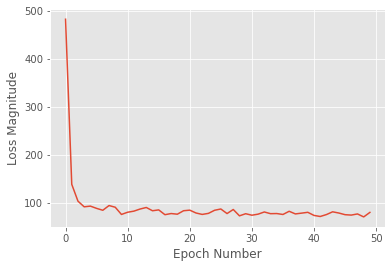

In [217]:
#將Layer放入Model中
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=8,input_shape=[X_dropped.shape[1]]),
    tf.keras.layers.Dense(units=32),
    tf.keras.layers.Dense(units=64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1)

    ])
# model = tf.keras.Sequential()  
# # 輸入層
# #model.add(Dense(units=3, input_dim=1, kernel_initializer='uniform', activation='relu'))
# model.add(tf.keras.layers.Dense(units=10, input_dim=9, kernel_initializer='uniform', activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))

# # 隱藏層
# #model.add(Dense(units=5, kernel_initializer='uniform', activation='relu'))
# model.add(tf.keras.layers.Dense(units=20, kernel_initializer='uniform', activation='relu'))
# model.add(tf.keras.layers.Dense(units=30, kernel_initializer='uniform', activation='relu'))
# model.add(tf.keras.layers.Dense(units=40, kernel_initializer='uniform', activation='relu', kernel_regularizer='l2'))
# model.add(tf.keras.layers.Dropout(0.2))

# # 輸出層
# #model.add(tf.keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
# model.add(tf.keras.layers.Dense(units=1)) #如果我們再做二元分類，輸出層就要使用sigmoid
#print("\n[Info] Show model summary...")  
model.summary()
print("\n[Info] 訓練中...")  

#compile()方法來指定損失函數與優化函數，也可以額外指定一系列的訓練和評估期間計算評量標準
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.01), metrics=['accuracy']) 
 
train_history = model.fit(x=X_dropped, y=Y_dropped, epochs=50, batch_size=30, verbose=2) #validation_split=0.1, 用最後的10%資料驗證


# early_stopping = tf.keras.callbacks.EarlyStopping(patience=25)
# train_history = model.fit(x=X_dropped, y=Y_dropped, validation_split=0.1, epochs=200, batch_size=30, verbose=2) 
 
# train_history = model.fit(X_dropped, Y_dropped, epochs=20, verbose=True)
print("Finished training the model")
model.save(save_model)

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(train_history.history['loss'])
plt.show()


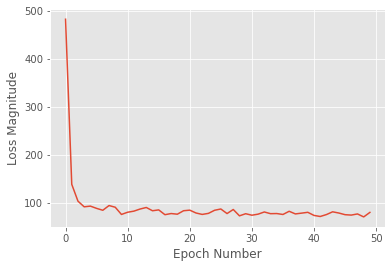

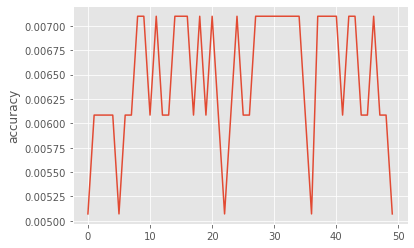

In [218]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(train_history.history['loss'], label = 'loss')

plt.show()
plt.ylabel("accuracy")
plt.plot(train_history.history['accuracy'], label = 'accuracy')# 準確度

plt.show()

In [216]:
#import matplotlib.pyplot as plt

def acc_draw(hist):
    plt.plot(hist.history['accuracy'], label = 'train')
    plt.plot(hist.history['val_accuracy'], label = 'validation')
    plt.title("train acc vs validation acc")
    plt.xlabel("Epochs")
    plt.ylabel("acc")
    plt.legend()
    plt.show()
def loss_draw(hist):
    plt.style.use('ggplot')
    plt.plot(hist.history['loss'], label = 'train')
    plt.plot(hist.history['val_loss'], label='validation')
    plt.title("train loss vs validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
 

KeyError: 'val_accuracy'

In [220]:
# df_test3.info()
#model = tf.keras.models.load_model(save_model)
# print(model.predict(df_test3))

# plt.xlabel('Seq Number')
plt.ylabel("Remain Days")

plt.plot(model.predict(X_dropped_test), label = "Predict", color='red', marker='.',linewidth = '0.5')
plt.plot(model.predict(Y_dropped_test), label = "remainDT", color='blue', marker='.',linewidth = '0.5')
plt.legend()
plt.show()

ValueError: Error when checking input: expected dense_112_input to have shape (9,) but got array with shape (1,)